In [1]:
!unzip /content/test_set.zip -d /content/
!unzip /content/training_set.zip -d /content/


Archive:  /content/test_set.zip
   creating: /content/test_set/
   creating: /content/test_set/cats/
  inflating: /content/test_set/cats/cat.4001.jpg  
  inflating: /content/test_set/cats/cat.4002.jpg  
  inflating: /content/test_set/cats/cat.4003.jpg  
  inflating: /content/test_set/cats/cat.4004.jpg  
  inflating: /content/test_set/cats/cat.4005.jpg  
  inflating: /content/test_set/cats/cat.4006.jpg  
  inflating: /content/test_set/cats/cat.4007.jpg  
  inflating: /content/test_set/cats/cat.4008.jpg  
  inflating: /content/test_set/cats/cat.4009.jpg  
  inflating: /content/test_set/cats/cat.4010.jpg  
  inflating: /content/test_set/cats/cat.4011.jpg  
  inflating: /content/test_set/cats/cat.4012.jpg  
  inflating: /content/test_set/cats/cat.4013.jpg  
  inflating: /content/test_set/cats/cat.4014.jpg  
  inflating: /content/test_set/cats/cat.4015.jpg  
  inflating: /content/test_set/cats/cat.4016.jpg  
  inflating: /content/test_set/cats/cat.4017.jpg  
  inflating: /content/test_set/c

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from utils import display  


# Parameters
BATCH_SIZE = 32
IMG_SIZE = (64, 64)  
NUM_CLASSES = 2
EPOCHS = 10

In [3]:
train_dir = '/content/training_set'
test_dir = '/content/test_set'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

Found 2023 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
def build_cnn_model(with_batchnorm_dropout=True):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    if with_batchnorm_dropout:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    if with_batchnorm_dropout:
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.3))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    if with_batchnorm_dropout:
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    if with_batchnorm_dropout:
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

model_basic = build_cnn_model(with_batchnorm_dropout=False)
model_with_bn_dropout = build_cnn_model(with_batchnorm_dropout=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
optimizer_basic = optimizers.Adam(learning_rate=0.0005)
optimizer_bn_dropout = optimizers.Adam(learning_rate=0.0005)

model_basic.compile(optimizer=optimizer_basic, loss='categorical_crossentropy', metrics=['accuracy'])
model_with_bn_dropout.compile(optimizer=optimizer_bn_dropout, loss='categorical_crossentropy', metrics=['accuracy'])

history_basic = model_basic.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)
history_bn_dropout = model_with_bn_dropout.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 498ms/step - accuracy: 0.5261 - loss: 0.7012 - val_accuracy: 0.5788 - val_loss: 0.6761
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 498ms/step - accuracy: 0.5741 - loss: 0.6755 - val_accuracy: 0.5848 - val_loss: 0.6630
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - accuracy: 0.6309 - loss: 0.6397 - val_accuracy: 0.6614 - val_loss: 0.6191
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 439ms/step - accuracy: 0.6264 - loss: 0.6352 - val_accuracy: 0.6500 - val_loss: 0.6209
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.6699 - loss: 0.6182 - val_accuracy: 0.7133 - val_loss: 0.5551
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 418ms/step - accuracy: 0.7133 - loss: 0.5667 - val_accuracy: 0.7454 - val_loss: 0.5251
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 412ms/step - accuracy: 0.7089 - loss: 0.5534 - val_accuracy: 0.7444 - val_loss: 0.5032
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 396ms/step - accuracy: 0.7168 - loss: 0.5525 - val_accuracy: 0.755

In [9]:
test_loss_basic, test_acc_basic = model_basic.evaluate(test_generator)
test_loss_bn_dropout, test_acc_bn_dropout = model_with_bn_dropout.evaluate(test_generator)

print(f"Test Accuracy without Batch Norm and Dropout: {test_acc_basic:.4f}")
print(f"Test Accuracy with Batch Norm and Dropout: {test_acc_bn_dropout:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.7880 - loss: 0.4561
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.7676 - loss: 0.7905
Test Accuracy without Batch Norm and Dropout: 0.7968
Test Accuracy with Batch Norm and Dropout: 0.7622


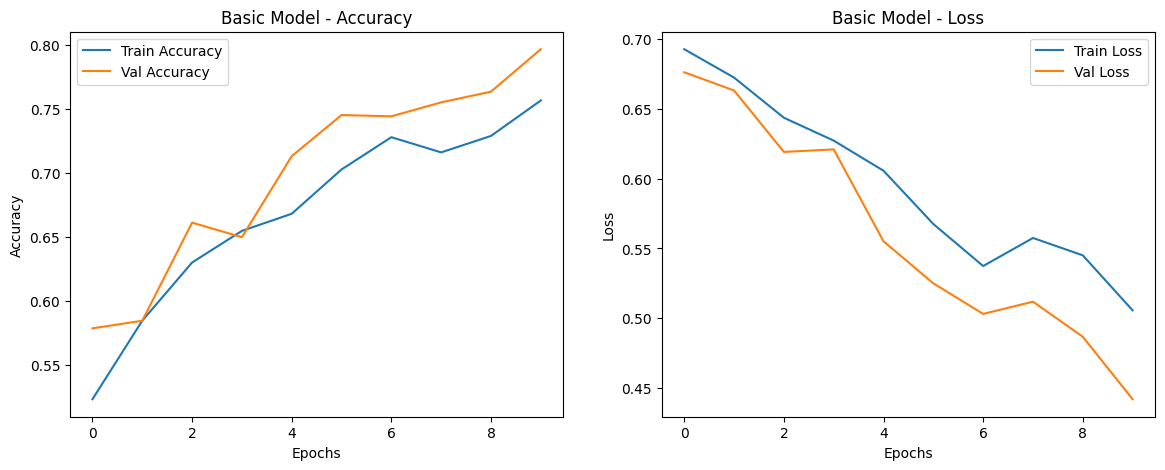

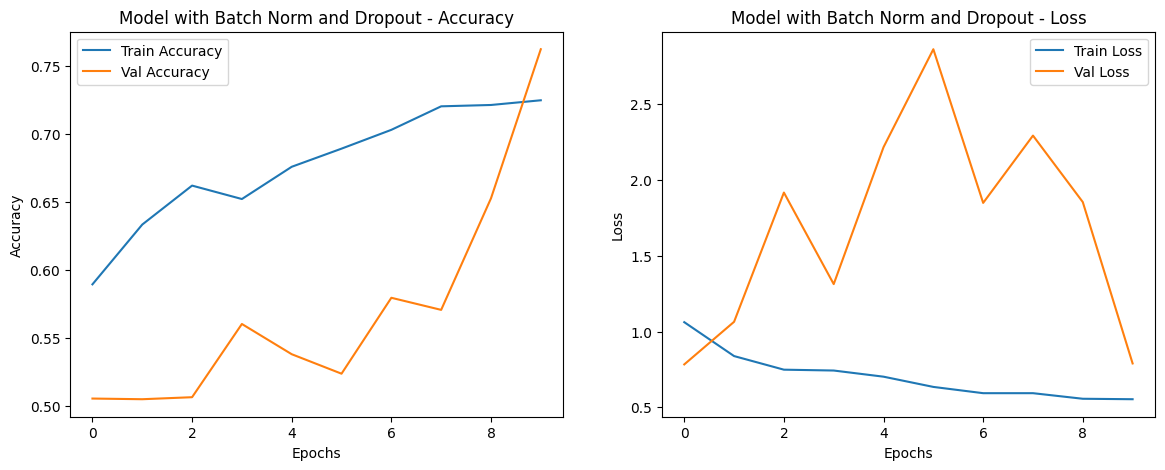

In [10]:
def plot_history(history, title="Model Accuracy and Loss"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

plot_history(history_basic, "Basic Model")
plot_history(history_bn_dropout, "Model with Batch Norm and Dropout")

64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step


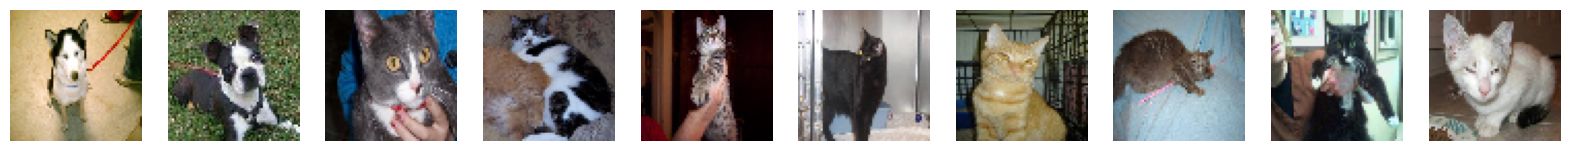

In [11]:
preds_basic = model_basic.predict(test_generator)
preds_bn_dropout = model_with_bn_dropout.predict(test_generator)

n_to_show = 10
sample_images, _ = next(test_generator)
display(sample_images[:n_to_show]) 